In [2]:
pip install networkx matplotlib

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 7.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 8.3 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 8.2 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ----------------------- -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


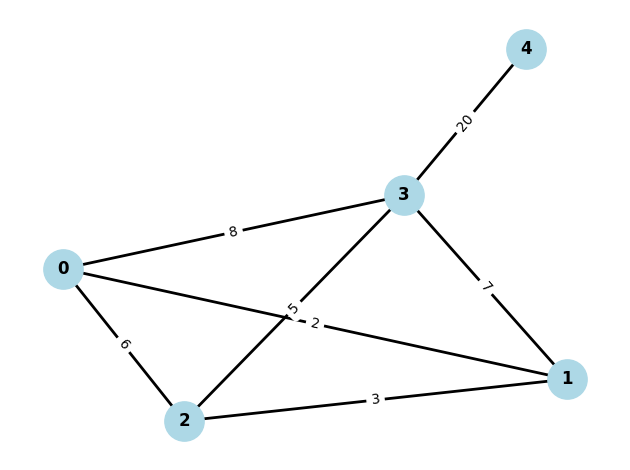

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# 주어진 edge 리스트 (노드 번호는 0부터 시작, 각 튜플은 (u, v, weight))
edges = [
    (0, 1, 2),
    (0, 2, 6),
    (0, 3, 8),
    (1, 2, 3),
    (1, 3, 7),
    (2, 3, 5),
    (3, 4, 20)
]

# 그래프 생성
G = nx.Graph()

# 간선 추가 (가중치 포함)
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# 레이아웃 설정 (위치 자동 조절)
pos = nx.spring_layout(G, seed=42)

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)

# 간선 그리기
nx.draw_networkx_edges(G, pos, width=2)

# 노드 라벨 그리기
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# 간선 가중치 라벨 표시
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 시각화
plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
import numpy as np

# 에지 정보 (노드 번호는 0부터 시작)
edges = [
    (0, 1, 2),
    (0, 2, 6),
    (0, 3, 8),
    (1, 2, 3),
    (1, 3, 7),
    (2, 3, 5),
    (3, 4, 20)
]

num_nodes = 5
start = 0  # 시작 노드를 0으로 설정

INF = float('inf')

# 인접 행렬 초기화
graph = np.full((num_nodes, num_nodes), INF)
for u, v, w in edges:
    graph[u][v] = w
    graph[v][u] = w  # 양방향 그래프

print('Graph')
print(graph)
print()

# 거리 배열 및 방문 여부 초기화
dist = np.full(num_nodes, INF)
visited = np.zeros(num_nodes, dtype=bool)
dist[start] = 0

print(f"초기 거리: {dist}")
print("-" * 40)

# 다익스트라 알고리즘 실행
for step in range(num_nodes):
    min_dist = INF
    u = -1
    for i in range(num_nodes):
        if not visited[i] and dist[i] < min_dist:
            min_dist = dist[i]
            u = i

    if u == -1:
        print("도달할 수 있는 노드 없음. 종료.")
        break

    visited[u] = True
    print(f"[{step + 1}단계] 노드 {u} 확정 (거리: {dist[u]})")

    for v in range(num_nodes):
        if not visited[v] and graph[u][v] != INF:
            if dist[v] > dist[u] + graph[u][v]:
                old_dist = dist[v]
                dist[v] = dist[u] + graph[u][v]
                print(f"  → 노드 {v} 거리 갱신: {old_dist} → {dist[v]}")

    print(f"  현재 거리 상태: {dist}")
    print("-" * 40)

# 최종 결과 출력
print(f"최종 거리: {dist}")


Graph
[[inf  2.  6.  8. inf]
 [ 2. inf  3.  7. inf]
 [ 6.  3. inf  5. inf]
 [ 8.  7.  5. inf 20.]
 [inf inf inf 20. inf]]

초기 거리: [ 0. inf inf inf inf]
----------------------------------------
[1단계] 노드 0 확정 (거리: 0.0)
  → 노드 1 거리 갱신: inf → 2.0
  → 노드 2 거리 갱신: inf → 6.0
  → 노드 3 거리 갱신: inf → 8.0
  현재 거리 상태: [ 0.  2.  6.  8. inf]
----------------------------------------
[2단계] 노드 1 확정 (거리: 2.0)
  → 노드 2 거리 갱신: 6.0 → 5.0
  현재 거리 상태: [ 0.  2.  5.  8. inf]
----------------------------------------
[3단계] 노드 2 확정 (거리: 5.0)
  현재 거리 상태: [ 0.  2.  5.  8. inf]
----------------------------------------
[4단계] 노드 3 확정 (거리: 8.0)
  → 노드 4 거리 갱신: inf → 28.0
  현재 거리 상태: [ 0.  2.  5.  8. 28.]
----------------------------------------
[5단계] 노드 4 확정 (거리: 28.0)
  현재 거리 상태: [ 0.  2.  5.  8. 28.]
----------------------------------------
최종 거리: [ 0.  2.  5.  8. 28.]


In [5]:
import numpy as np

def dijkstra(edges, num_nodes, start, end):
    INF = float('inf')

    # 인접 행렬: (num_nodes x num_nodes), 0-based indexing
    graph = np.full((num_nodes, num_nodes), INF)
    for u, v, w in edges:
        graph[u][v] = w
        graph[v][u] = w  # 양방향 그래프

    # 거리 및 방문 여부 초기화
    dist = np.full(num_nodes, INF)
    dist[start] = 0
    visited = np.zeros(num_nodes, dtype=bool)

    for _ in range(num_nodes):
        # 방문하지 않은 노드 중 최단 거리 선택
        min_dist = INF
        u = -1
        for i in range(num_nodes):
            if not visited[i] and dist[i] < min_dist:
                min_dist = dist[i]
                u = i

        if u == -1:
            break  # 더 이상 진행 불가능

        visited[u] = True

        # 인접 노드들 거리 갱신
        for v in range(num_nodes):
            if not visited[v] and graph[u][v] != INF:
                dist[v] = min(dist[v], dist[u] + graph[u][v])

    return dist[end] if dist[end] != INF else -1

edges = [
    (0, 1, 2),
    (0, 2, 6),
    (0, 3, 8),
    (1, 2, 3),
    (1, 3, 7),
    (2, 3, 5),
    (3, 4, 20)
]

start = 0  # 1번 노드 → 0번
end = 3    # 4번 노드 → 3번
num_nodes = 5

shortest = dijkstra(edges, num_nodes, start, end)
print(f"노드 {start}에서 노드 {end}까지 최단 거리: {shortest}")

노드 0에서 노드 3까지 최단 거리: 8.0
